## Getting Famliar with the dataset

In [3]:
str(iris)


'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [4]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

**Iris Dataset is pretty much clean as expected with the variable beign encoded in the proper format. Further more there does not seem to be any need of normalization with the Feature variables measured in the common unit with only minute differences in the Central Tendency (mean median)**

## Explotary Data Analysis

Explotary Data Analysis is the logical next Step. Through EDA We scrutinize features to gain a better understanding of the data that you are working. Specifically The EDA

* Is helpful in finding the variables which have low variance in general. This would be a problem as it might not help the Algorithm in classificatiion

* Check for correlation between pair of attributes. A very strong correlation might show the variable are redudant and one of columns can be dropped

* Open the chances for Feature engineering ( Eg Adding one feature to another)

In [1]:
library(ggplot2)

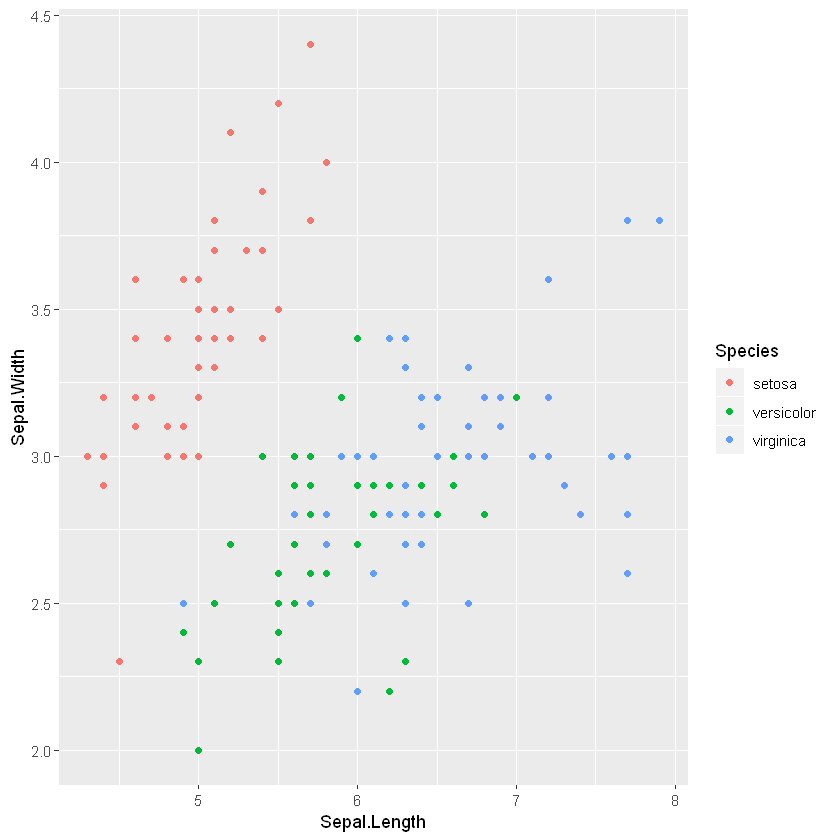

In [2]:
ggplot(aes(Sepal.Length,Sepal.Width),data=iris)+geom_point(aes(col=Species))

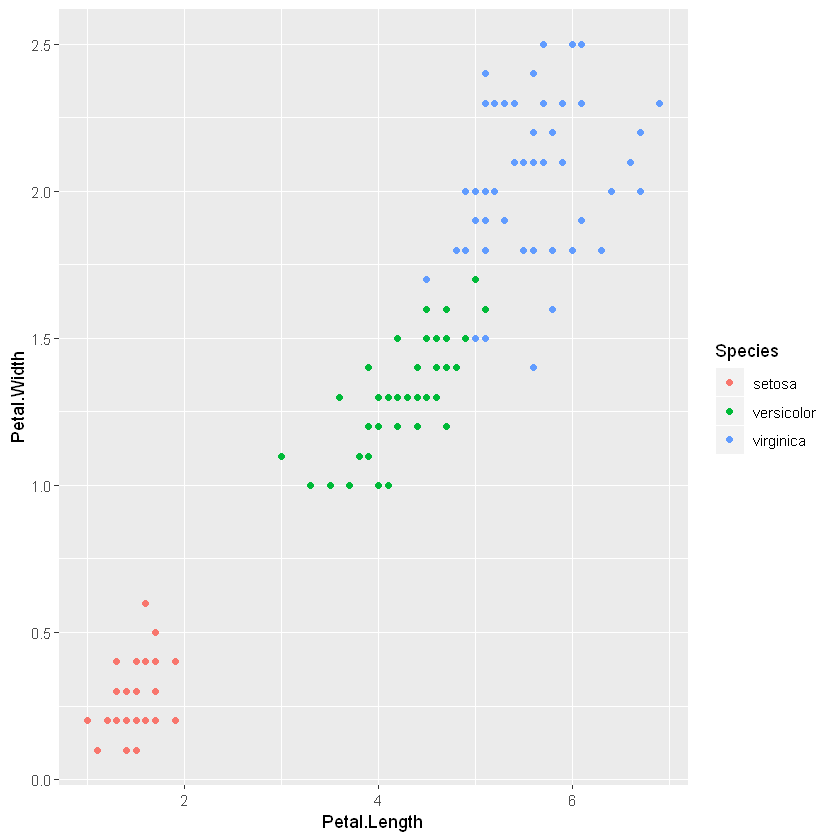

In [3]:
ggplot(aes(Petal.Length,Petal.Width),data=iris)+geom_point(aes(col=Species))

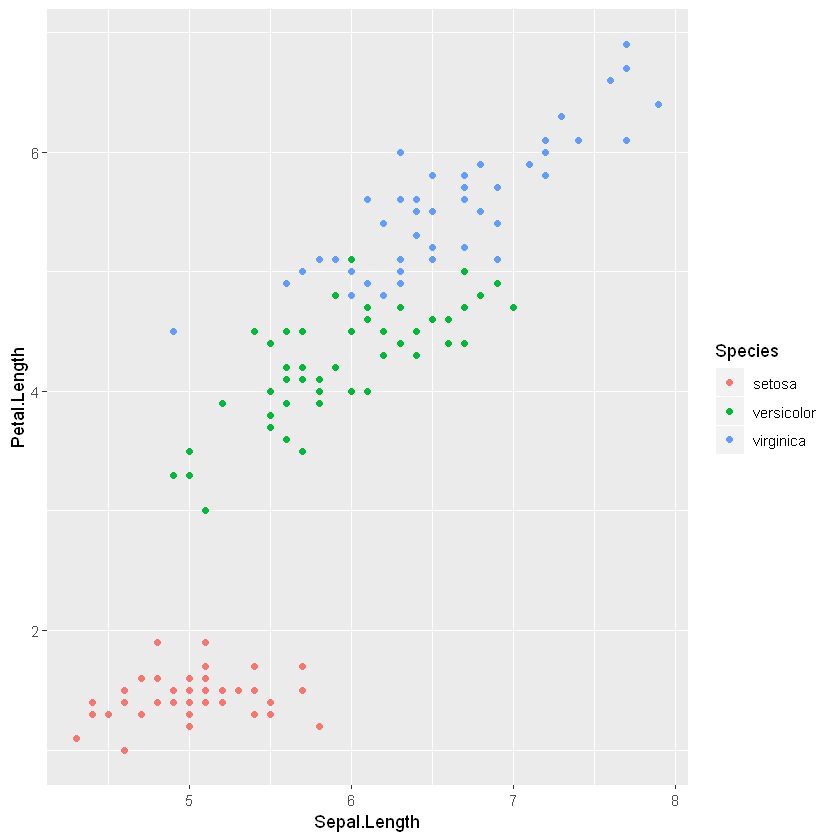

In [4]:
ggplot(aes(Sepal.Length,Petal.Length),data=iris)+geom_point(aes(col=Species))

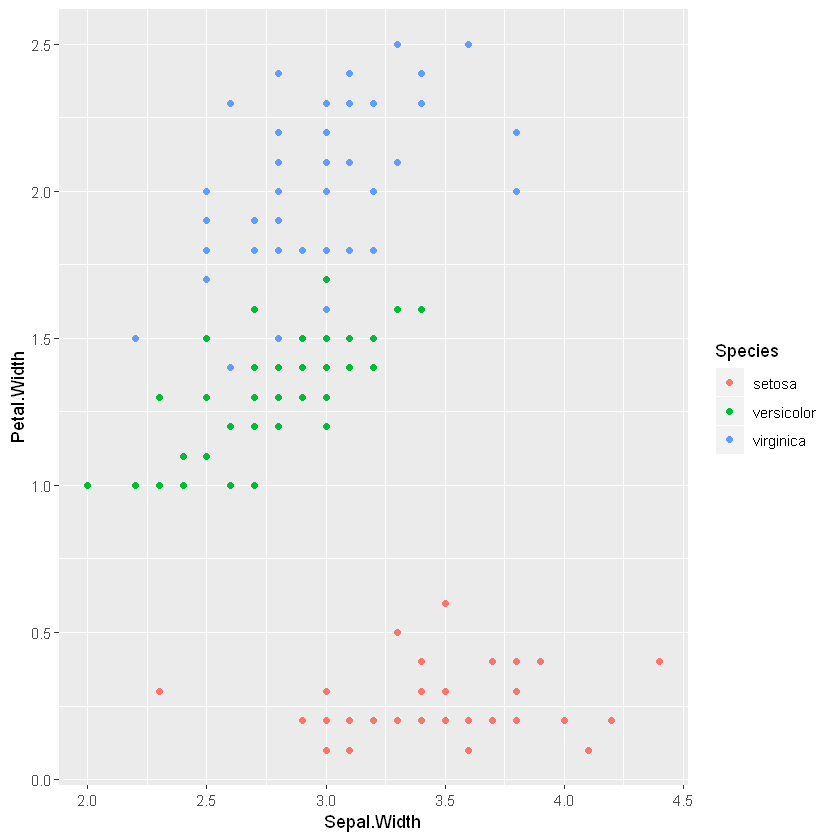

In [5]:
ggplot(aes(Sepal.Width,Petal.Width),data=iris)+geom_point(aes(col=Species))

**Looking at the scatter plot between the pair of attributes, we found that while setosa can be classfied pretty much nicley, the classifier might have problem in classifying versicolor and virginica perfectly as there are some overlapping points most prominent in Plot 1**

In [8]:
library(caret)

Loading required package: lattice


## Splitting and Training

In [9]:
createDataPartition(iris$Species,list=F,p=0.7) -> index

In [10]:
iris[index,] -> Train
iris[-index,] -> Test

_Decision Tree_

In [11]:
train(Species~.,data=Train,method = "rpart",trControl = trainControl(method = "cv",number = 5),tuneLength = 10) -> Model

The meaning of Keyword Arguments in train function of caret library are here as follows 
* method = rpart (Decision Tree Classifier)
* Train Control - Responsible for Evaluation and Model Selection
    *  method = cv (Cross Validation). In cross Validation the k folds are developed and in each interation classifier trains on k-1 folds and test on last fold. The results from each of the iterations are combined to get final trainined model as well as evaluation measure. Here i have used 5 folds as depicted through the number keyword argument
    * tune length - No of Different Hyperparameter selection. Here i have used 10 so it should remain an exhaustive search
    

In [12]:
Model

CART 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 84, 84, 84, 84, 84 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9428571  0.9142857
  0.05555556  0.9428571  0.9142857
  0.11111111  0.9428571  0.9142857
  0.16666667  0.9428571  0.9142857
  0.22222222  0.9428571  0.9142857
  0.27777778  0.9428571  0.9142857
  0.33333333  0.9428571  0.9142857
  0.38888889  0.9428571  0.9142857
  0.44444444  0.8761905  0.8142857
  0.50000000  0.3333333  0.0000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.3888889.

Here we got a maximum accuracy of about 94 percent

_Random Forest_

In [13]:
train(Species~.,data=Train,method = "rf",trControl = trainControl(method = "cv",number = 5),tuneLength = 10) -> Model

note: only 3 unique complexity parameters in default grid. Truncating the grid to 3 .



In [14]:
Model

Random Forest 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 84, 84, 84, 84, 84 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa
  2     0.9333333  0.9  
  3     0.9333333  0.9  
  4     0.9333333  0.9  

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

Random Forest perfomed worse than Decision Tree as we got a maximum accuracy of about 93 percent

_KNN_

In [15]:
train(Species~.,data=Train,method = "knn",trControl = trainControl(method = "cv",number = 5),tuneLength = 10) -> Model

In [16]:
Model

k-Nearest Neighbors 

105 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 84, 84, 84, 84, 84 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9714286  0.9571429
   7  0.9714286  0.9571429
   9  0.9619048  0.9428571
  11  0.9619048  0.9428571
  13  0.9714286  0.9571429
  15  0.9619048  0.9428571
  17  0.9619048  0.9428571
  19  0.9523810  0.9285714
  21  0.9523810  0.9285714
  23  0.9333333  0.9000000

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 13.

Intrestingly we got a maximum accuracy in Knn for k=13 and thus we are going to use this model for classification

In [18]:
confusionMatrix(predict(Model,Test,type = "raw"),Test$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         14         0
  virginica       0          1        15

Overall Statistics
                                          
               Accuracy : 0.9778          
                 95% CI : (0.8823, 0.9994)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9667          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9333           1.0000
Specificity                 1.0000            1.0000           0.9667
Pos Pred Value              1.0000            1.0000           0.9375
Neg Pred Value              1.0000            0.9677           1.0000
Prevalence                  0.3333          

**1. The Findings are well consistent with the plots we had made. There were couple of points of Virginica which were in Versicolor , so its no surpirise algorithm werent able to draw a nice clean decision boundary and thus we got a single missclassifed point**. 

**2. I also suspect the only reason we got a single missclassified point in knn beacuse We considered 13 neighbours majority votes for classiifying . Any lower than that and we would be end up lot more missclasssified points because there are points of Virginica which were squarely in versicolor***